In [1]:
import pandas as pd
import numpy as np
import requests
import urllib2, json, sys
import matplotlib.pyplot as plt
%matplotlib inline
# coding=utf-8

In [2]:
import networkx as nx
import codecs
UTF8Writer = codecs.getwriter('utf8')
sys.stdout = UTF8Writer(sys.stdout)

In [3]:
VK_API_TOKEN = 'My token was here'
VK_USER_ID = 182824801
#url  = u'https://api.vk.com/method/friends.get?fields=sex,city,education&uid=%s&lang=en&version=5.73&access_token=%s' %(VK_USER_ID ,VK_API_TOKEN)
#res  = urllib2.urlopen(url).read()
#data = json.loads( res )

In [5]:
def get_friends(user_id):
    url  = u'https://api.vk.com/method/friends.get?fields=sex,city,education&uid=%s&lang=en&version=5.73&access_token=%s' %(user_id ,VK_API_TOKEN)
    res  = urllib2.urlopen(url).read()
    data = json.loads( res )
    return pd.io.json.json_normalize(data['response'])

Let's construct a nice pandas dataframe from our JSON

In [27]:
df = get_friends(VK_USER_ID)
df.insert(0, 'is_friend_of', VK_USER_ID)

In [28]:
df.head()

,is_friend_of,city,deactivated,education_form,education_status,faculty,faculty_name,first_name,graduation,last_name,online,sex,uid,university,university_name,user_id
0,182824801,NaN,banned,NaN,NaN,NaN,NaN,Mrs,NaN,Smith,0,1,16450,NaN,NaN,16450
1,182824801,0.0,NaN,Full-time,Alumna (Bachelor's),475.0,Факультет социальных наук (Государственного и ...,Adel,2008.0,Shadrina,0,1,42727,128.0,НИУ ВШЭ (ГУ-ВШЭ),42727
2,182824801,1.0,NaN,NaN,NaN,NaN,NaN,Kirill,NaN,Gomenyuk,0,2,50385,NaN,NaN,50385
3,182824801,1.0,NaN,Full-time,Student (Bachelor's),474.0,Факультет бизнеса и менеджмента (Бизнес-информ...,Anton,2016.0,Piskunov,0,2,4411633,128.0,НИУ ВШЭ (ГУ-ВШЭ),4411633
4,182824801,0.0,NaN,Full-time,NaN,1484.0,Факультет геологии и геофизики нефти и газа,Sonya,0.0,Gogoleva,1,1,4793267,334.0,РГУ нефти и газа (НИУ) им. И. М. Губкина,4793267


In [29]:
import time
frames = [df]
# Let's get all friends for each our friend
i = 1
for item in df.uid:
    print'iteration', i
    i = i + 1
    print'friend uid', item
    try:
        new_df = get_friends(item)
        new_df.insert(0, 'is_friend_of', item)
        frames.append(new_df)
        # print the number of friends just to be sure that we are not banned on this step
        print'new request len', len(new_df)
        # VK API has a query limit - 3 queries per second, so, we better wait for 0.4 seconds after each query to be sure not to get banned
        time.sleep(0.4)
    except:
        # sometimes we can get an error if the user is banned, or if we are banned
        print('error')

iteration 1
friend uid 16450
error
iteration 2
friend uid 42727
new request len 2511
iteration 3
friend uid 50385
new request len 367
iteration 4
friend uid 4411633
new request len 744
iteration 5
friend uid 4793267
new request len 198
iteration 6
friend uid 5417191
new request len 327
iteration 7
friend uid 6093731
new request len 132
iteration 8
friend uid 6388013
new request len 510
iteration 9
friend uid 6537447
new request len 156
iteration 10
friend uid 6633765
new request len 452
iteration 11
friend uid 6805396
new request len 397
iteration 12
friend uid 6862930
new request len 624
iteration 13
friend uid 7048636
new request len 212
iteration 14
friend uid 7083123
new request len 221
iteration 15
friend uid 7321434
new request len 1205
iteration 16
friend uid 7343298
new request len 284
iteration 17
friend uid 7358127
new request len 246
iteration 18
friend uid 7422772
new request len 170
iteration 19
friend uid 7623029
new request len 596
iteration 20
friend uid 8038711
new req

Now, let's remove banned users and self from our dataframe

In [30]:
#merge all our data
result = pd.concat(frames)

In [31]:
len(result)

59680

We have length of 59680. Let's save our data to csv to not to deal with VK API again

In [32]:
result.to_csv('data.csv', encoding='utf8')

In [33]:
result.head()

,city,deactivated,education_form,education_status,faculty,faculty_name,first_name,graduation,is_friend_of,last_name,lists,online,sex,uid,university,university_name,user_id
0,NaN,banned,NaN,NaN,NaN,NaN,Mrs,NaN,182824801,Smith,NaN,0,1,16450,NaN,NaN,16450
1,0.0,NaN,Full-time,Alumna (Bachelor's),475.0,Факультет социальных наук (Государственного и ...,Adel,2008.0,182824801,Shadrina,NaN,0,1,42727,128.0,НИУ ВШЭ (ГУ-ВШЭ),42727
2,1.0,NaN,NaN,NaN,NaN,NaN,Kirill,NaN,182824801,Gomenyuk,NaN,0,2,50385,NaN,NaN,50385
3,1.0,NaN,Full-time,Student (Bachelor's),474.0,Факультет бизнеса и менеджмента (Бизнес-информ...,Anton,2016.0,182824801,Piskunov,NaN,0,2,4411633,128.0,НИУ ВШЭ (ГУ-ВШЭ),4411633
4,0.0,NaN,Full-time,NaN,1484.0,Факультет геологии и геофизики нефти и газа,Sonya,0.0,182824801,Gogoleva,NaN,1,1,4793267,334.0,РГУ нефти и газа (НИУ) им. И. М. Губкина,4793267
5,1.0,NaN,NaN,NaN,NaN,NaN,Daniil,NaN,182824801,Korolev,NaN,0,2,5417191,NaN,NaN,5417191
6,0.0,NaN,NaN,NaN,0.0,,Dasha,0.0,182824801,Andreeva,NaN,0,1,6093731,0.0,,6093731
7,1.0,NaN,Full-time,Student (Bachelor's),484.0,Факультет экономических наук,Katya,0.0,182824801,Kolfild,NaN,0,1,6388013,128.0,НИУ ВШЭ (ГУ-ВШЭ),6388013
8,61.0,NaN,Full-time,Alumna (Specialist),2704.0,Институт экономики и менеджмента,Yulya,2008.0,182824801,Bulatova,NaN,0,1,6537447,541.0,БФУ им. Канта (бывш. РГУ им. Канта),6537447
9,1.0,NaN,NaN,NaN,NaN,NaN,Alexandra,NaN,182824801,Popova,NaN,0,1,6633765,NaN,NaN,6633765


In [14]:
data = pd.read_csv('data.csv')

Now we surely saved our raw friends data to csv.

In [21]:
my_friends = list(data[data.is_friend_of == VK_USER_ID].uid)


In [22]:
# let's build a graph
np_df = data.as_matrix()
G = nx.Graph()
friends = []
names = {}
cities = {}
universities = {}
faculties = {}
for item in np_df:
    user_id = item[14] # user id
    if (user_id in my_friends):
        if not G.has_node(user_id):
            G.add_node(user_id)
            name = item[7] + ' ' + item[10] # get first name + last name
            names[user_id] = name
            cities[user_id] = item[1] # get city
            universities[user_id] = item[16] # get uni & faculty
            faculties[user_id] = item[6]
        from_id = item[9] # is friend of
        friends.append(user_id)
        if from_id != VK_USER_ID:
            G.add_edge(from_id, user_id)

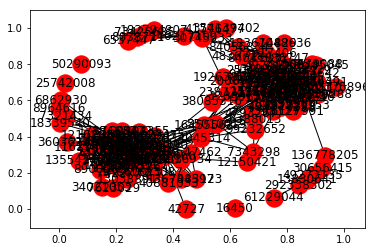

In [24]:
nx.draw_networkx(G)

In [25]:
#take all nodes with degree >= 20
G1 = G.copy()
for node in G1.nodes():
    if G1.degree(node) < 20:
        G1.remove_node(node)

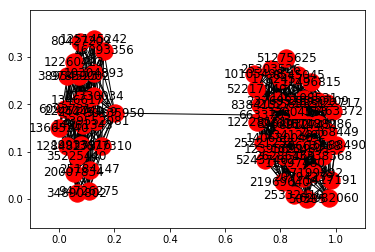

In [26]:
nx.draw_networkx(G1)

We can clearly see here two main groups

In [27]:
nx.write_graphml(G, 'graph.graphml')

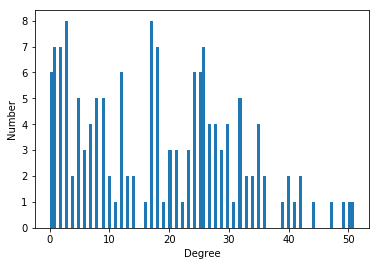

In [28]:
degrees_dictionary = nx.degree(G)
degrees = np.array(degrees_dictionary.values())

# show node degrees
plt.xlabel('Degree')
plt.ylabel('Number')
plt.hist(degrees, 100)
plt.show()

Not even close to power law

In [29]:
len(G.nodes())

153

In [30]:
# The Graph is not connected, so we'll take the largest connectivity component
components = sorted(nx.connected_component_subgraphs(G),key=len,reverse=True)
nx.radius(components[0])

4

In [31]:
nx.diameter(components[0])

8

In [32]:
nx.clustering(G)

{16450: 0.0,
 42727: 0.0,
 50385: 0.55,
 4411633: 0.6102941176470589,
 4793267: 0.6818181818181818,
 5417191: 0.4707692307692308,
 6093731: 0.64,
 6388013: 0.6666666666666666,
 6537447: 1.0,
 6633765: 0.5697478991596638,
 6805396: 0.5882352941176471,
 6862930: 0.0,
 7048636: 0.0,
 7083123: 0.6666666666666666,
 7321434: 1.0,
 7343298: 1.0,
 7358127: 0.625,
 7422772: 0.9560439560439561,
 7623029: 1.0,
 8038711: 1.0,
 8545045: 0.6322751322751323,
 8900083: 1.0,
 8920879: 0.7192982456140351,
 8954930: 0.5052854122621564,
 8964616: 0.0,
 10105498: 0.7210144927536232,
 10304893: 0.46554621848739497,
 11397480: 0.5523809523809524,
 11496815: 0.5504032258064516,
 11776426: 0.5833333333333334,
 12150421: 0.0,
 12162034: 0.8888888888888888,
 12228151: 0.6189516129032258,
 12260423: 0.6738461538461539,
 12330034: 0.5704099821746881,
 12349850: 0.23809523809523808,
 12395691: 0.5005807200929152,
 12848273: 0.6633333333333333,
 12904533: 0.5564102564102564,
 13038891: 0.8,
 13231153: 0.790849673202

In [33]:

#Quick snapshot of the Network
print nx.info(G)

Name: 
Type: Graph
Number of nodes: 153
Number of edges: 1401
Average degree:  18.3137


In [34]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(G)

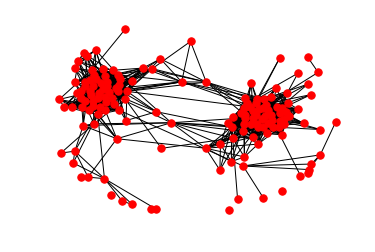

In [35]:
plt.axis("off")
nx.draw_networkx(G, pos = spring_pos, with_labels = False, node_size = 55)

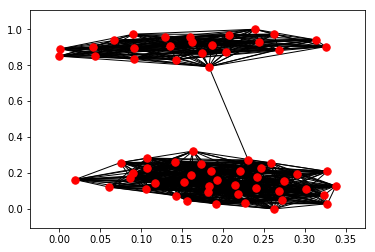

In [36]:
nx.draw_networkx(G1, pos = nx.spring_layout(G1), with_labels = False, node_size = 55)

In [37]:
from multiprocessing import Pool
2
import itertools


In [38]:
def partitions(nodes, n):
    nodes_iter = iter(nodes)
    while True:
        partition = tuple(itertools.islice(nodes_iter,n))
        if not partition:
            return
        yield partition

# To begin the parallel computation, we initialize a Pool object with the

# number of available processors on our hardware. We then partition the

# network based on the size of the Pool object (the size is equal to the

# number of available processors).

def between_parallel(G, processes = None):
    p = Pool(processes=processes)
    part_generator = 4*len(p._pool)
    node_partitions = list(partitions(G.nodes(), int(len(G)/part_generator)))
    num_partitions = len(node_partitions)
    #Next, we pass each processor a copy of the entire network and
    #compute the betweenness centrality for each vertex assigned to the
    #processor.
    bet_map = p.map(btwn_pool,
                    zip([G]*num_partitions,
                        [True]*num_partitions,
                        [None]*num_partitions,
                        node_partitions))
    #Finally, we collect the betweenness centrality calculations from each
    #pool and aggregate them together to compute the overall betweenness
    #centrality score for each vertex in the network.
    bt_c = bet_map[0]
    for bt in bet_map[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c


In [39]:
def btwn_pool(G_tuple):
    return nx.betweenness_centrality_source(*G_tuple)

In [40]:
def between_parallel(G, processes = None):
    p = Pool(processes=processes)
    part_generator = 4*len(p._pool)
    node_partitions = list(partitions(G.nodes(), int(len(G)/part_generator)))
    num_partitions = len(node_partitions)
 
    bet_map = p.map(btwn_pool,
                        zip([G]*num_partitions,
                        [True]*num_partitions,
                        [None]*num_partitions,
                        node_partitions))
 
    bt_c = bet_map[0]
    for bt in bet_map[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

Betweenness Centrality

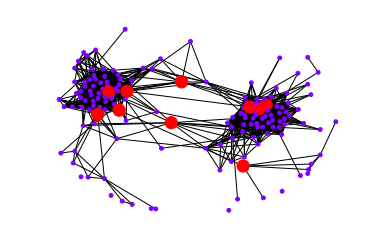

In [41]:
bt = between_parallel(G)
top = 10
max_nodes =  sorted(bt.iteritems(), key = lambda v: -v[1])[:top]
bt_values = [15]*len(G.nodes())
bt_colors = [0]*len(G.nodes())
for max_key, max_val in max_nodes:
    index = G.nodes().index(max_key)
    bt_values[index] = 150
    bt_colors[index] = 2
 
plt.axis("off")
nx.draw_networkx(G, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)

In [42]:
# top 10 betweenness centrality nodes
for max_key, max_val in max_nodes:
    print(names[max_key])

Valeria Khazova
Alexandra Popova
Nikolay Kuznetsov
Alexander Zazulin
Anton Scherbakov
Andrey Isachenko
Alexander Korzhakov
Olga Binyavskaya
Vika Akhromkina
Pasha Babanov


Closeness Centrality + top 10 nodes

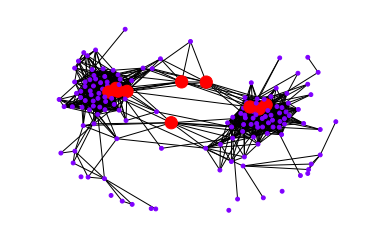

In [43]:
ct = nx.closeness_centrality(G)
top = 10
max_nodes1 =  sorted(ct.iteritems(), key = lambda v: -v[1])[:top]
ct_values = [15]*len(G.nodes())
ct_colors = [0]*len(G.nodes())
for max_key, max_val in max_nodes1:
    index = G.nodes().index(max_key)
    ct_values[index] = 150
    ct_colors[index] = 2
 
plt.axis("off")
nx.draw_networkx(G, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = ct_colors, node_size = ct_values, with_labels = False)

In [44]:
for max_key, max_val in max_nodes1:
    print(names[max_key])

Valeria Khazova
Alexandra Popova
Olga Binyavskaya
Alexander Zazulin
Alexey Antonchenko
Anastasia Zubkova
Alexey Volkov
Pasha Babanov
Vika Akhromkina
Anton Scherbakov


Degree centrality + top 10 nodes

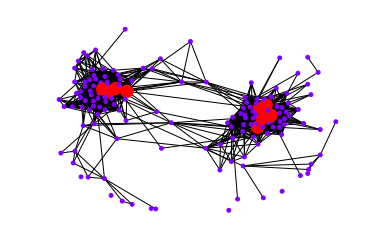

In [45]:
dt = nx.degree_centrality(G)
top = 10
max_nodes2 =  sorted(dt.iteritems(), key = lambda v: -v[1])[:top]
dt_values = [15]*len(G.nodes())
dt_colors = [0]*len(G.nodes())
for max_key, max_val in max_nodes2:
    index = G.nodes().index(max_key)
    dt_values[index] = 150
    dt_colors[index] = 2
 
plt.axis("off")
nx.draw_networkx(G, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = dt_colors, node_size = dt_values, with_labels = False)

In [46]:
for max_key, max_val in max_nodes2:
    print(names[max_key])

Yulia Kuznetsova
Olga Binyavskaya
Valeria Khazova
Pasha Babanov
Vika Akhromkina
Sergey Ipatov
Lyubov Korzh
Olesya Tinkova
Nikita Krikun
Alexey Volkov


In [47]:
pr = sorted(nx.pagerank(G).items(), key=lambda x: x[1], reverse=True)

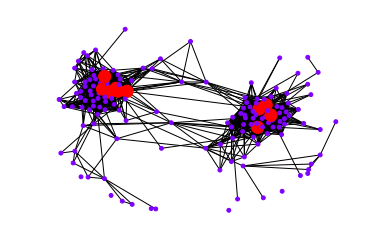

In [48]:
pr = nx.pagerank(G)
top = 10
max_nodes3 =  sorted(pr.iteritems(), key = lambda v: -v[1])[:top]
pr_values = [15]*len(G.nodes())
pr_colors = [0]*len(G.nodes())
for max_key, max_val in max_nodes3:
    index = G.nodes().index(max_key)
    pr_values[index] = 150
    pr_colors[index] = 2
 
plt.axis("off")
nx.draw_networkx(G, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = pr_colors, node_size = pr_values, with_labels = False)

In [49]:
for max_key, max_val in max_nodes3:
    print(names[max_key])

Olga Binyavskaya
Valeria Khazova
Yulia Kuznetsova
Sergey Ipatov
Vika Akhromkina
Pasha Babanov
Alexey Volkov
Anastasia Zubkova
Lyubov Korzh
Danil Rakshas


In [51]:
import igraph as ig
from community import community_louvain
g = ig.Graph.TupleList(G.edges(), directed=True)

In [52]:
parts = community_louvain.best_partition(G)
values = [parts.get(node) for node in G.nodes()]

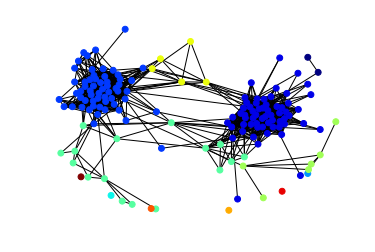

In [58]:
plt.axis("off")
nx.draw_networkx(G, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 35, with_labels = False)

153